<a href="https://colab.research.google.com/github/H-b-IO-T-O-H/ML_lr1/blob/main/lr4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import numpy as np
import pandas as pd
import random
import matplotlib.pylab as plt 
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split

from matplotlib.pylab import rcParams

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
data = pd.read_csv('drive/MyDrive/Colab Notebooks/winequality-red.csv', sep = ',')
data.head(10)
RSEED = 50
#data['quality_binary'] = np.where(data['quality']>=6, 1, 0)
#data.pop('quality')
#labels = np.array(data.pop('quality_binary'))
labels = np.array(data.pop('quality'))

In [ ]:
# 30% examples in test data
X_train, X_test, y_train, y_test = train_test_split(data, labels, 
                                         stratify = labels,
                                         test_size = 0.3, 
                                         random_state = RSEED
                                         )
print(len(X_train), len(y_train))

1119 1119


In [ ]:
# One decision tree regressor
dtree = DecisionTreeRegressor(max_depth=7).fit(X_train, y_train)
d_predict = dtree.predict(X_test)

Text(0.5, 1.0, 'Решающее дерево, MSE = 0.471')

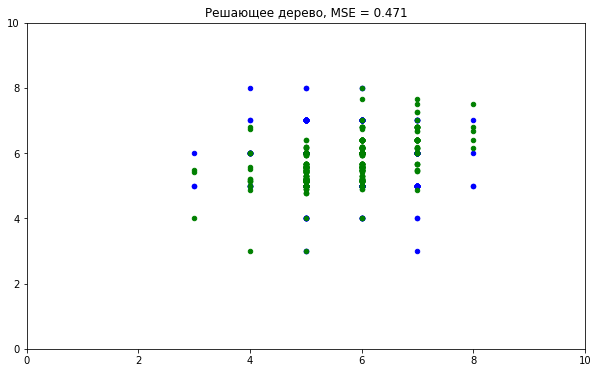

In [ ]:
from sklearn.metrics import mean_squared_error

y_tr = y_train[:480]
plt.figure(figsize=(10, 6))
#plt.plot(y_train, y_test, "b")
plt.scatter(y_tr, y_test, c="b", s=20)
plt.scatter(y_test, d_predict, c="g", s=20)
plt.xlim([0, 10])
plt.ylim([0,10])
plt.title("Решающее дерево, MSE = %.3f"%mean_squared_error(y_test, d_predict))

Одиночное дерево оказалось нестабильным. Если вместо отдельных обучающих выборок (которых нам, как правило, всегда не хватает) выполнить бутстреп и на основе сгенерированных псевдо-выборок построить деревья регрессии, то средний коллективный прогноз будет обладать более низкой дисперсией и обладать большей стабильностью.

In [ ]:
bdt = BaggingRegressor(DecisionTreeRegressor()).fit(X_train, y_train)
bdt_predict = bdt.predict(X_test)

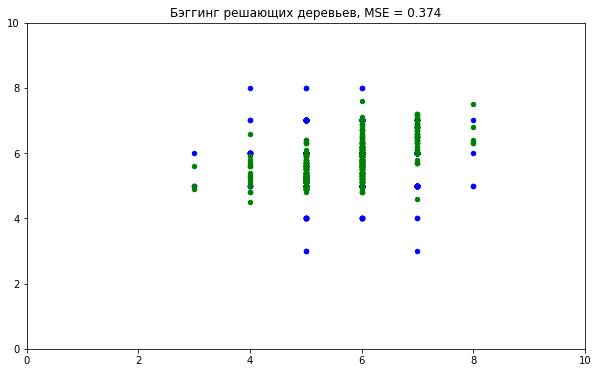

In [ ]:
y_tr = y_train[:480]
plt.figure(figsize=(10, 6))
#plt.plot(y_train, y_test, "b")
plt.scatter(y_tr, y_test, c="b", s=20)
plt.scatter(y_test, bdt_predict, c="g", s=20)
plt.xlim([0, 10])
plt.ylim([0,10])
plt.title("Бэггинг решающих деревьев, MSE = %.3f" % mean_squared_error(y_test, bdt_predict));

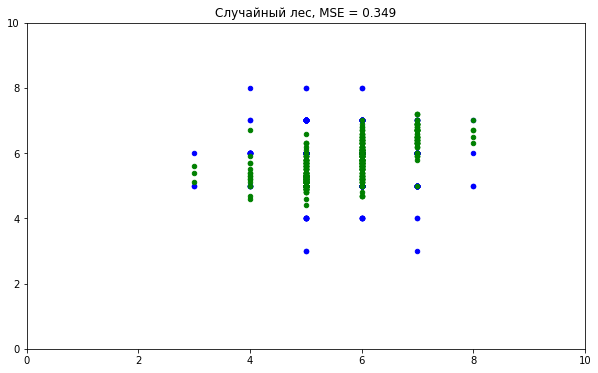

In [ ]:
# Random Forest
rf = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)
rf_predict = rf.predict(X_test)

y_tr = y_train[:480]
plt.figure(figsize=(10, 6))
#plt.plot(y_train, y_test, "b")
plt.scatter(y_tr, y_test, c="b", s=20)
plt.scatter(y_test, rf_predict, c="g", s=20)
plt.xlim([0, 10])
plt.ylim([0,10])
plt.title("Случайный лес, MSE = %.3f" % mean_squared_error(y_test, rf_predict));

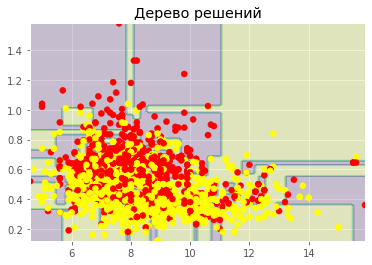

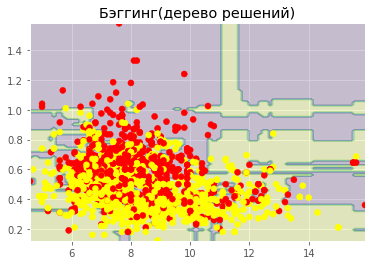

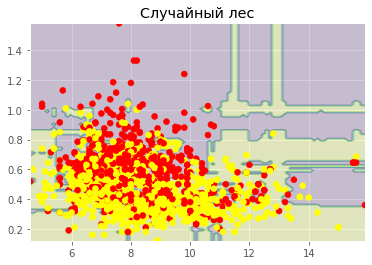

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
%matplotlib inline

data = pd.read_csv('drive/MyDrive/Colab Notebooks/winequality-red.csv', sep = ',')
X = np.array(data[['fixed acidity','volatile acidity']])
data['quality_binary'] = np.where(data['quality']>=6, 1, 0)

y = data['quality_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                         stratify = y,
                                         test_size = 0.3, 
                                         random_state = RSEED
                                         )

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel(), ])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Дерево решений")
plt.show()

b_dtree = BaggingClassifier(DecisionTreeClassifier(), n_estimators=300, random_state=42)
b_dtree.fit(X_train, y_train)

x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
y_hat = b_dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Бэггинг решающих деревьев")
plt.show()

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Случайный лес")
plt.show()

In [ ]:
print("desicion tree = %.3f" % dtree.score(X_test, y_test),
      "bagging dtree = %.3f" % b_dtree.score(X_test, y_test),
      "random forest = %.3f" % rf.score(X_test, y_test), sep="\n")

desicion tree = 0.677
bagging dtree = 0.702
random forest = 0.717
